In [1]:
from tabulate import tabulate
import pandas as pd
df = pd.read_csv("DataFrame0")
df1 = pd.read_csv("DataFrame1")
df2 = pd.read_csv("DataFrame2")
dfs = [df,df1,df2]
#Cleaning Phase
for df in dfs:
    del df['Unnamed: 0']
    df.dropna(subset=['Player'], how='all', inplace=True)
    df.dropna(subset=['Victories in Season'], how='all', inplace=True)
    df['Won Conference'].fillna(0, inplace=True)
    df['Is All-Star'].fillna(0, inplace=True)
    df['MVP Prospect'].fillna(0, inplace=True)
    # df['MVP Prospect'] = df['Points Per Game (PPG)'].apply(lambda x: 1 if x > 27 else 0)
    # df['MVP Prospect'] = df['Defensive Rebounds Per Game (DRPG)'].apply(lambda x: 1 if x >=7 else 0)
    # df['MVP Prospect'] = df['Blocks'].apply(lambda x: 1 if x >=0.6 else 0)
    df['MVP Prospect'] = df[['Points Per Game (PPG)', 'Defensive Rebounds Per Game (DRPG)', 'Blocks']].apply(lambda x: 1 if (x['Points Per Game (PPG)'] >= 27) | (x['Defensive Rebounds Per Game (DRPG)'] >= 6) | (x['Blocks'] >= 0.6) else 0, axis=1)
result = pd.concat([df,df1,df2])

result.dropna(how="any",inplace=True)
# select only the numeric columns
numeric_cols = result.select_dtypes(include=['float64','int64']).columns
result.to_csv("result")
print(tabulate(result, headers='keys'))

     Player                    Position      Age  Salary       Team      Won Conference    Victories in Season    All Points    Points Per Game (PPG)    Team Conference Rank    Is All-Star    Plus/Minus    Offensive Rebounds Per Game (ORPG)    Defensive Rebounds Per Game (DRPG)    Assists Per Game (APG)    Games Played    Minutes Per Game    Blocks    Steals     %3     %2  year       MVP Prospect
---  ------------------------  ----------  -----  -----------  ------  ----------------  ---------------------  ------------  -----------------------  ----------------------  -------------  ------------  ------------------------------------  ------------------------------------  ------------------------  --------------  ------------------  --------  --------  -----  -----  -------  --------------
  0  Steven Adams              C              26  $29,895,313  OKC                    0                     44           684                     10.9                       9              0           2

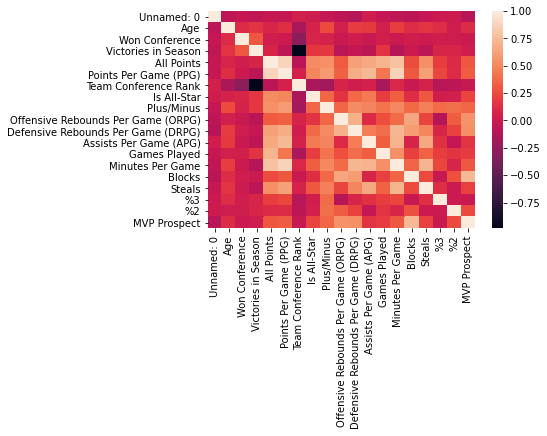

In [8]:
import webbrowser
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import Image, display
import pydotplus
from scipy import misc
df = pd.read_csv("DataFrame0")
df1 = pd.read_csv("DataFrame1")
df2 = pd.read_csv("DataFrame2")
mvp_df = pd.read_csv("All Time MVP's")
result = pd.read_csv("result")
dfs = [df,df1,df2]

# Convert the 'Player' column to a string
df['Player'] = df['Player'].astype(str)
df1['Player'] = df1['Player'].astype(str)
df2['Player'] = df2['Player'].astype(str)
avg_ppg = mvp_df['Points Per Game (PPG)'].mean()


# def renderTree(my_tree, features):
#     # hacky solution of writing to files and reading again
#     # necessary due to library bugs
#     filename = "temp.dot"
#     with open(filename, 'w') as f:
#         f = tree.export_graphviz(my_tree,
#                                  out_file=f,
#                                  feature_names=features,
#                                  class_names=["Dead", "Survived"],
#                                  filled=True,
#                                  rounded=True,
#                                  special_characters=True)
#
#     dot_data = ""
#     with open(filename, 'r') as f:
#         dot_data = f.read()
#
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     image_name = "temp.png"
#     graph.write_png(image_name)
#     display(Image(filename=image_name))


#Heat Map
sns.heatmap(result._get_numeric_data().corr())
plt.show()

#scatter plots
filtered_df = result[result['Points Per Game (PPG)'] > avg_ppg]





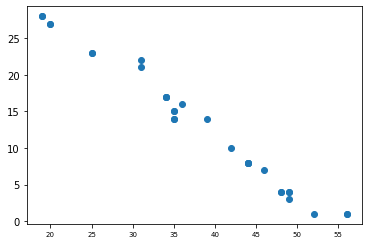

In [9]:
plt.scatter(filtered_df['Victories in Season'], filtered_df['Team Conference Rank'])
plt.tick_params(axis='x', labelsize=7)
plt.show()

In [6]:
#Vaw Effect
webbrowser.open_new_tab('https://www.youtube.com/watch?v=dQw4w9WgXcQ&ab_channel=RickAstley')

True

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.ensemble import RandomForestClassifier
result = pd.read_csv("result")
del result['Unnamed: 0']

# split to train and test using only the numeric columns
X_train,X_test,y_train,y_test = train_test_split(result[['Victories in Season','Team Conference Rank','Minutes Per Game','Is All-Star']],result['MVP Prospect'],random_state=42,test_size=0.3)

clf = DecisionTreeClassifier(max_depth=4, min_samples_split=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Predicted labels:\n", y_pred)
print("Actual labels:\n", y_test.values)
print(acc)

y_pred_padded = np.pad(y_pred, (0, result.shape[0]-y_pred.shape[0]), 'constant')
df_y_pred = pd.DataFrame({'Player': result['Player'], 'y_pred': y_pred_padded})
player_names = df_y_pred.loc[df_y_pred['y_pred'] == 1, 'Player']
print(player_names)

# print(tabulate(result, headers='keys'))


Predicted labels:
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0]
Actual labels:
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 